In [4]:
!pip install --upgrade pip
!pip install annoy
!pip install -U sentence-transformers


In [5]:
from annoy import AnnoyIndex

In [6]:
from sentence_transformers import SentenceTransformer

In [7]:
model = SentenceTransformer('snunlp/KR-SBERT-V40K-klueNLI-augSTS')

In [4]:
import pandas as pd

In [5]:
music = pd.read_csv('music.csv')

In [23]:
music.head()

,제목,가수,발매일,장르,가사,이미지
0,날 사랑했다면,박학기,1993.10.01,발라드,떠나버린 널 깨닫기엔\n하늘이 너무 맑아\n우리에게 필요한 건 시간일뿐\n\n영화속...,https://cdnimg.melon.co.kr/cm/album/images/005...
1,그대 떠난 이밤에,옥슨 80,1981.09.25,록/메탈,바람부네 아픈 내맘에\n아름다운 추억 못잊어 부네\n그대 떠난 이밤\n그대 떠난 이...,https://cdnimg.melon.co.kr/cm/album/images/000...
2,나는 홀로 있어도,유심초,1980.11.01,성인가요/트로트,하얀 불빛 아래에\n침묵만이 흐르고\n낯설은 네 눈길에\n눈물만이 흐르네\n멀어져 ...,https://cdnimg.melon.co.kr/cm/album/images/003...
3,Love Is (Dance Mega Mix Ver.),터보,2001.06.20,댄스,우린 6년전에 만났지\n\n널 사랑하게 됐어\n\n내 마음을 숨긴체\n\n널 따라 ...,https://cdnimg.melon.co.kr/cm/album/images/003...
4,사랑밖엔 난 몰라 (Original Ver.),심수봉,2009.08.13,성인가요/트로트,그대 내 곁에선 순간\n\n그 눈빛이 너무 좋아\n\n어제는 울었지만\n\n오늘은 ...,https://cdnimg.melon.co.kr/cm/album/images/006...


In [17]:
music.shape[0]

4411

In [28]:
lyric = model.encode(music['가사'])

In [30]:
lyric.shape

(4411, 768)

In [20]:
## 가사 df로 indexing
len_vec = 768
annoy_index = AnnoyIndex(len_vec, 'angular')  

for k in range(music.shape[0]):
    idx = k 
    lyrics = music['가사'][k]
    annoy_index.add_item(idx, model.encode(lyrics))
    
annoy_index.build(50)
annoy_index.save('service_index.annoy')

IndexError: Vector has wrong length (expected 768, got 4411)

In [4]:
## 어노이 파일 로드
len_vec = 768
annoy_index = AnnoyIndex(len_vec, 'angular')
annoy_index.load('service_index.annoy')

True

In [5]:
import pandas as pd
demo = pd.read_csv('demo_file.csv')

In [9]:
demo['vector'][0]

'[-4.20372903e-01 -7.88039029e-01 -5.03567040e-01 -1.53698802e-01\n  6.42678559e-01 -2.61752069e-01  1.48119688e+00 -3.90733212e-01\n -1.11432910e-01 -7.97260046e-01  7.12023601e-02  8.73293996e-01\n -9.36981797e-01 -2.92355061e-01 -2.36210182e-01 -4.33267474e-01\n -2.20746957e-02 -9.00215268e-01 -3.68242800e-01  6.59475327e-01\n -1.51100785e-01  1.51965916e-01  3.80431473e-01  1.03498185e+00\n  1.03010857e+00  4.46588278e-01 -7.60338962e-01  8.18068385e-01\n  6.63969398e-01 -2.64301360e-01  2.91337550e-01 -1.70999908e+00\n  6.60224438e-01  6.78755641e-01  3.79909612e-02 -7.50754714e-01\n -6.52528405e-01  2.34099805e-01  2.42128342e-01 -1.31645811e+00\n -1.65855241e+00 -3.71998698e-01 -8.80940259e-01  3.28619480e-01\n  1.48523286e-01 -1.22464269e-01  1.62027150e-01  3.76077652e-01\n  9.51249152e-02  2.38492742e-01 -2.80220270e-01 -1.65090173e-01\n -1.26466084e+00 -9.82442856e-01 -4.74216998e-01 -1.63147986e-01\n -5.08257926e-01 -1.77780199e+00 -7.62338191e-02 -5.97721815e-01\n -1.25833

In [89]:
test_lyric = demo[5]['sum']
## prediction
annoy_index.get_nns_by_vector(model.encode(test_lyric), 10)

[5, 2407, 3306, 3052, 1052, 4277, 3105, 1809, 1827, 2695]

## test 
리메이크 곡  threshold 방법론
1. vector id로 인접한 id 와 vector 100개 추출
2. cosain sim 계산
3. 리메이크곡들의 threshold 점수 파악
4. 리메이크곡을 제하고 추천

In [8]:
%config Completer.use_jedi = False
import pandas as pd
import pickle
data = pd.read_csv('demo_file.csv')

In [13]:
data

,idx,text,sum,vector
0,1,바람부네 아픈 내맘에 아름다운 추억 못잊어 부네 그대 떠난 이밤 그대 떠난 이밤이 ...,그대 떠난 이밤 그대 떠난 이밤이 깊어갈수록 사랑의 노래 울려퍼지네 우리 사랑이 울...,[-4.20372903e-01 -7.88039029e-01 -5.03567040e-...
1,2,하얀 불빛 아래에 침묵만이 흐르고 낯설은 네 눈길에 눈물만이 흐르네 멀어져 간 발길...,나는 홀로 있어도 나는 네가 없어도 마지막 네 손길은 변치 않는 영원이라고 생각 하...,[-3.36009383e-01 3.45138490e-01 -1.10923612e+...
2,3,우린 6년전에 만났지 널 사랑하게 됐어 내 마음을 숨긴체 널 따라 다녀었지 ...,우리는 6년전에 만났지 널 사랑하게 됐고 내 친구는 나를 위해 애썼고 마침내 내 사...,[-5.04430175e-01 -4.94674921e-01 -4.49510217e-...
3,4,그대 내 곁에선 순간 그 눈빛이 너무 좋아 어제는 울었지만 오늘은 당신 땜에 ...,그대 내 곁에선 순간 그 눈빛이 너무 좋아 오늘은 당신 땜에 내일은 행복할꺼야 부드...,[ 1.36163339e-01 -5.18326581e-01 -6.56149149e-...
4,5,내 좋은 여자친구는 가끔씩 나를 보면 얘길 해달라 졸라대고는 하지 남자들만의 우정이...,내 좋은 여자친구는 가끔 나를 보면 얘기를 해달라고 졸라대고 남자들만의 우정이라는 ...,[-1.09913146e+00 -6.54485166e-01 -4.07702953e-...
...,...,...,...,...
4405,4406,널 이렇게 보내 줄 수 밖에 없었어 나 후회할 지도 모른 채 끝없이 다가오는 너와의...,혼자라는 생각 때문에 힘들때면 뒤를 돌아봐 나는 언제나 여기 서 있을게 혼자 가는 ...,[ 0.13472843 -0.37932223 -0.7140768 0.538677...
4406,4407,오늘도 친구들이 왔어 MAN HOW YOU BEEN WHATS UP AYE 여기 한...,친구들이 왔어 우리 젊기에 후회 따윈 내일 해 위험해 AYE MAN YOU BETT...,[-4.60637689e-01 -5.28599620e-01 -3.94943476e-...
4407,4408,느낌이 오잖아 떨리고 있잖아 언제까지 눈치만 볼 거니 네 맘을 말해봐 딴청 ...,느낌이 오잖아 떨리고 있어 언제까지 눈치만 볼 거니 네 맘을 말해봐 딴청 피우지 말...,[-0.3879724 -0.651834 -0.63475764 0.073556...
4408,4409,말해줄래 나를 위해라면 이러진 말아 아직 그댈 놓아주기에는 너무 난 두려워 이미 지...,나를 위해라면 이러진 말아 이미 지나간 일이 아니라면 숨기지 말아 다시 예전처럼 내...,[ 3.95583957e-02 -5.21100640e-01 -7.84078360e-...


In [5]:
len_vec = 768
annoy_index = AnnoyIndex(len_vec, 'angular')
annoy_index.load('lyrics.annoy')

True

In [14]:
test_lyric = '바람부네 아픈 내맘에 아름다운 추억 못잊어 부네 그대 떠난 이밤 그대 떠난 이밤이 깊어갈수록 사랑의 노래 울려퍼지네 우리 사랑에 오 해가저문 이밤에 다시 불러보네 아름다운 추억의 사랑의 노래 이제 하염없이 흐르는 눈물자욱 위에 떠가네 그대 떠난 이밤에 다시 불러보네 외로워진 마음의 사랑의 노래 나는 그대의 사랑노래 고이 간직하며 살리라 비가 오면 아름다워라 사랑의 추억 아름다워라 그대 떠난 이밤에 그대 떠난 이밤이 깊어갈수록 사랑노래 울려퍼지네 우리 사랑이 울려퍼지네 오 해가 저문 이밤에 다시 불러보네 아름다운 추억의 사랑의 노래 이제 하염없이 흐르는 눈물자욱 위에 떠가네 그대 떠난 이밤에 다시 불러보네 외로워진 마음의 사랑의 노래 나는 그대의 사랑노래 고이 간직하며 살리라 눈 내리는 창가에 앉아 포근한 추억 어루만지네 그대 떠난 이밤 그대 떠난 이밤이 깊어갈수록 사랑노래 울려퍼지네 우리 사랑에 해가 저문 이밤에 다시 불러보네 아름다운 추억의 사랑의 노래 이제 하염없이 흐르는 눈물자욱 위에 떠가네 그대 떠난 이밤에 다시 불러보네 외로워진 마음의 사랑의 노래 나는 그대의 사랑노래 고이 간직하며 살리라 나는 그대의 사랑노래 고이 간직하며 살리라'
## prediction
#annoy_index.get_nns_by_vector(model.encode(test_lyric), 7 ,  include_distances=True)
nns = annoy_index.get_nns_by_item(1, 100 ,  include_distances=True)

In [42]:
pred_list = []
for threshold in range(len(nns[1])):
    if nns[1][threshold] >0.55:
        ## annoy index distance 
        print(nns[1][threshold] )
        my_string = ', '.join(str(x) for x in nns[0][1:])
        # pred_list.append(nns[0][threshold])
print(my_string,'*'*50, len(my_string.split(',')))

0.551189661026001
0.552936315536499
0.5541340708732605
0.5573707818984985
0.5578522682189941
0.5579968094825745
0.5585442781448364
0.5597269535064697
0.5601159334182739
0.5602558255195618
0.5606377720832825
0.5607553124427795
0.5609076023101807
0.562555730342865
0.562598705291748
0.562662661075592
0.5628220438957214
0.56329745054245
0.5635834336280823
0.5638926029205322
0.5641195178031921
0.564430832862854
0.5650986433029175
0.5659854412078857
0.5663585066795349
0.5684820413589478
0.5685070753097534
0.5687558054924011
0.5692812204360962
0.5697306394577026
0.5701777935028076
0.570983350276947
0.5717693567276001
0.5723669528961182
0.5723669528961182
0.5727903246879578
0.572884738445282
0.5729259848594666
0.5731614828109741
0.5732626914978027
0.5737393498420715
0.5744813680648804
0.5755204558372498
0.5771622061729431
0.5778179168701172
0.5784467458724976
0.5784569978713989
0.5788130760192871
0.578864336013794
0.5791024565696716
0.5793917179107666
0.5805462598800659
0.5806772708892822
0.58

In [15]:
vectors = [2407, 279, 3052, 1090, 3, 3415, 3847, 4309, 3464, 2062]
for i in vectors:
    v = annoy_index.get_distance(2407,i)
    print(v)

0.0
0.6610481142997742
0.6344109773635864
0.6032317876815796
0.6431308388710022
0.6521032452583313
0.6333134174346924
0.6568395495414734
0.6343403458595276
0.7000609636306763


In [36]:

# calculate the cosine distance between vectors 0 and 1
cosine_distance = annoy_index.get_distance(2407, 279)

# convert the cosine distance to a similarity score
similarity_score = 1 - cosine_distance

print('Cosine distance: ', cosine_distance)
print('Similarity score: ', similarity_score)

Cosine distance:  0.6610481142997742
Similarity score:  0.33895188570022583


In [40]:
##  최종 threshold 
my_indexes = [index for i, index in enumerate(nns[0]) if nns[1][i] > 0.5]
my_string = ', '.join(str(x) for x in my_indexes)

In [43]:
string = my_indexes[:5]

In [44]:
string

[1191, 1716, 476, 3948, 2769]

## PCA test

In [3]:
%config Completer.use_jedi = False
import pandas as pd
import pickle
data = pd.read_csv('demo_file.csv')

In [24]:
data

,idx,text,sum,vector
0,1,바람부네 아픈 내맘에 아름다운 추억 못잊어 부네 그대 떠난 이밤 그대 떠난 이밤이 ...,그대 떠난 이밤 그대 떠난 이밤이 깊어갈수록 사랑의 노래 울려퍼지네 우리 사랑이 울...,[-4.20372903e-01 -7.88039029e-01 -5.03567040e-...
1,2,하얀 불빛 아래에 침묵만이 흐르고 낯설은 네 눈길에 눈물만이 흐르네 멀어져 간 발길...,나는 홀로 있어도 나는 네가 없어도 마지막 네 손길은 변치 않는 영원이라고 생각 하...,[-3.36009383e-01 3.45138490e-01 -1.10923612e+...
2,3,우린 6년전에 만났지 널 사랑하게 됐어 내 마음을 숨긴체 널 따라 다녀었지 ...,우리는 6년전에 만났지 널 사랑하게 됐고 내 친구는 나를 위해 애썼고 마침내 내 사...,[-5.04430175e-01 -4.94674921e-01 -4.49510217e-...
3,4,그대 내 곁에선 순간 그 눈빛이 너무 좋아 어제는 울었지만 오늘은 당신 땜에 ...,그대 내 곁에선 순간 그 눈빛이 너무 좋아 오늘은 당신 땜에 내일은 행복할꺼야 부드...,[ 1.36163339e-01 -5.18326581e-01 -6.56149149e-...
4,5,내 좋은 여자친구는 가끔씩 나를 보면 얘길 해달라 졸라대고는 하지 남자들만의 우정이...,내 좋은 여자친구는 가끔 나를 보면 얘기를 해달라고 졸라대고 남자들만의 우정이라는 ...,[-1.09913146e+00 -6.54485166e-01 -4.07702953e-...
...,...,...,...,...
4405,4406,널 이렇게 보내 줄 수 밖에 없었어 나 후회할 지도 모른 채 끝없이 다가오는 너와의...,혼자라는 생각 때문에 힘들때면 뒤를 돌아봐 나는 언제나 여기 서 있을게 혼자 가는 ...,[ 0.13472843 -0.37932223 -0.7140768 0.538677...
4406,4407,오늘도 친구들이 왔어 MAN HOW YOU BEEN WHATS UP AYE 여기 한...,친구들이 왔어 우리 젊기에 후회 따윈 내일 해 위험해 AYE MAN YOU BETT...,[-4.60637689e-01 -5.28599620e-01 -3.94943476e-...
4407,4408,느낌이 오잖아 떨리고 있잖아 언제까지 눈치만 볼 거니 네 맘을 말해봐 딴청 ...,느낌이 오잖아 떨리고 있어 언제까지 눈치만 볼 거니 네 맘을 말해봐 딴청 피우지 말...,[-0.3879724 -0.651834 -0.63475764 0.073556...
4408,4409,말해줄래 나를 위해라면 이러진 말아 아직 그댈 놓아주기에는 너무 난 두려워 이미 지...,나를 위해라면 이러진 말아 이미 지나간 일이 아니라면 숨기지 말아 다시 예전처럼 내...,[ 3.95583957e-02 -5.21100640e-01 -7.84078360e-...


In [30]:
vec2 = model.encode(data['text'])

In [9]:
from sklearn.decomposition import PCA
pca_3d = PCA(n_components=3)
comps = pca_3d.fit_transform(vec)
df_comps = pd.DataFrame(comps, columns=['com_1','com_2','com_3'],
                       index = data['idx'][:5])

In [10]:
df_comps

,com_1,com_2,com_3
idx,,,
1,-7.138496,-3.547751,-5.088736
2,-4.542934,8.576948,1.957707
3,5.992784,-0.973917,2.148571
4,-1.816822,-5.354063,5.114830
5,7.505466,1.298787,-4.132373


In [28]:
print('max = ',df_comps.max() , '\n min =',df_comps.min() )

max =  com_1    7.505467
com_2    8.576944
com_3    5.114826
dtype: float32 
 min = com_1   -7.138491
com_2   -5.354070
com_3   -5.088738
dtype: float32


In [15]:
df_comps.reset_index(inplace =True)

In [19]:
df_comps

,idx,com_1,com_2,com_3
0,1,-7.138496,-3.547751,-5.088736
1,2,-4.542934,8.576948,1.957707
2,3,5.992784,-0.973917,2.148571
3,4,-1.816822,-5.354063,5.114830
4,5,7.505466,1.298787,-4.132373


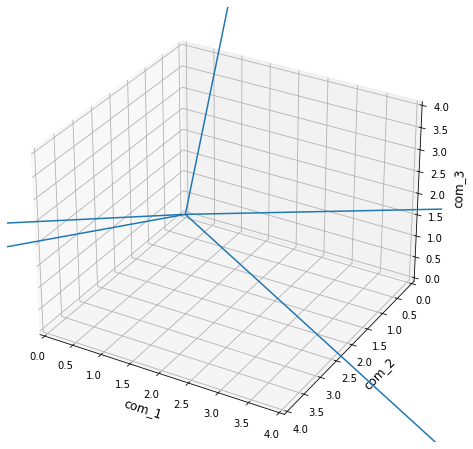

In [22]:
import matplotlib.pyplot as plt
import numpy as np
com_1_label = 'com_1'
com_2_label = 'com_2'
com_3_label = 'com_3'
fig = plt.figure(figsize =(8,8))
ax = fig.add_subplot(projection='3d')

## 좌표상에 나타낼 row만 추출
# target_word = [1,2,3]
# df_target = df_comps.loc[target_word]
for word , word_vec in df_comps.iterrows():
    x = word_vec[com_1_label]
    y = word_vec[com_2_label]
    z = word_vec[com_3_label]
    vec_len = np.linalg.norm(np.array([x,y,z]))
    ax.quiver(0,0,0,(x+0.05), y, (z-0.3), arrow_length_ratio=0.1/vec_len)
    ax.text(x,y, z, s=df_comps.loc[word, 'idx'], size =12 , fontweight ='bold')
    ax.scatter(x,y,z , c='white')

ax.set_xlim(0,4)
ax.set_ylim(4,0)
ax.set_zlim(0,4)

ax.set_xlabel(com_1_label , fontsize=12)
ax.set_ylabel(com_2_label , fontsize=12)
ax.set_zlabel(com_3_label , fontsize=12)

plt.show()

In [18]:
vec_len

8.66575839636445

## clustering visualization 

In [31]:
# sklearn
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
y_pred

array([ 7,  0, 10, ..., 19, 10, 11], dtype=int32)

In [36]:
BASE_DIR = '/home/lab12'

/home/ubuntu/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ubuntu/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 4410 samples in 0.003s...
[t-SNE] Computed neighbors for 4410 samples in 0.560s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4410
[t-SNE] Computed conditional probabilities for sample 2000 / 4410
[t-SNE] Computed conditional probabilities for sample 3000 / 4410
[t-SNE] Computed conditional probabilities for sample 4000 / 4410
[t-SNE] Computed conditional probabilities for sample 4410 / 4410
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.556595
[t-SNE] KL divergence after 1000 iterations: 1.769242
Embedding shape 확인 (4410, 2)


/home/ubuntu/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


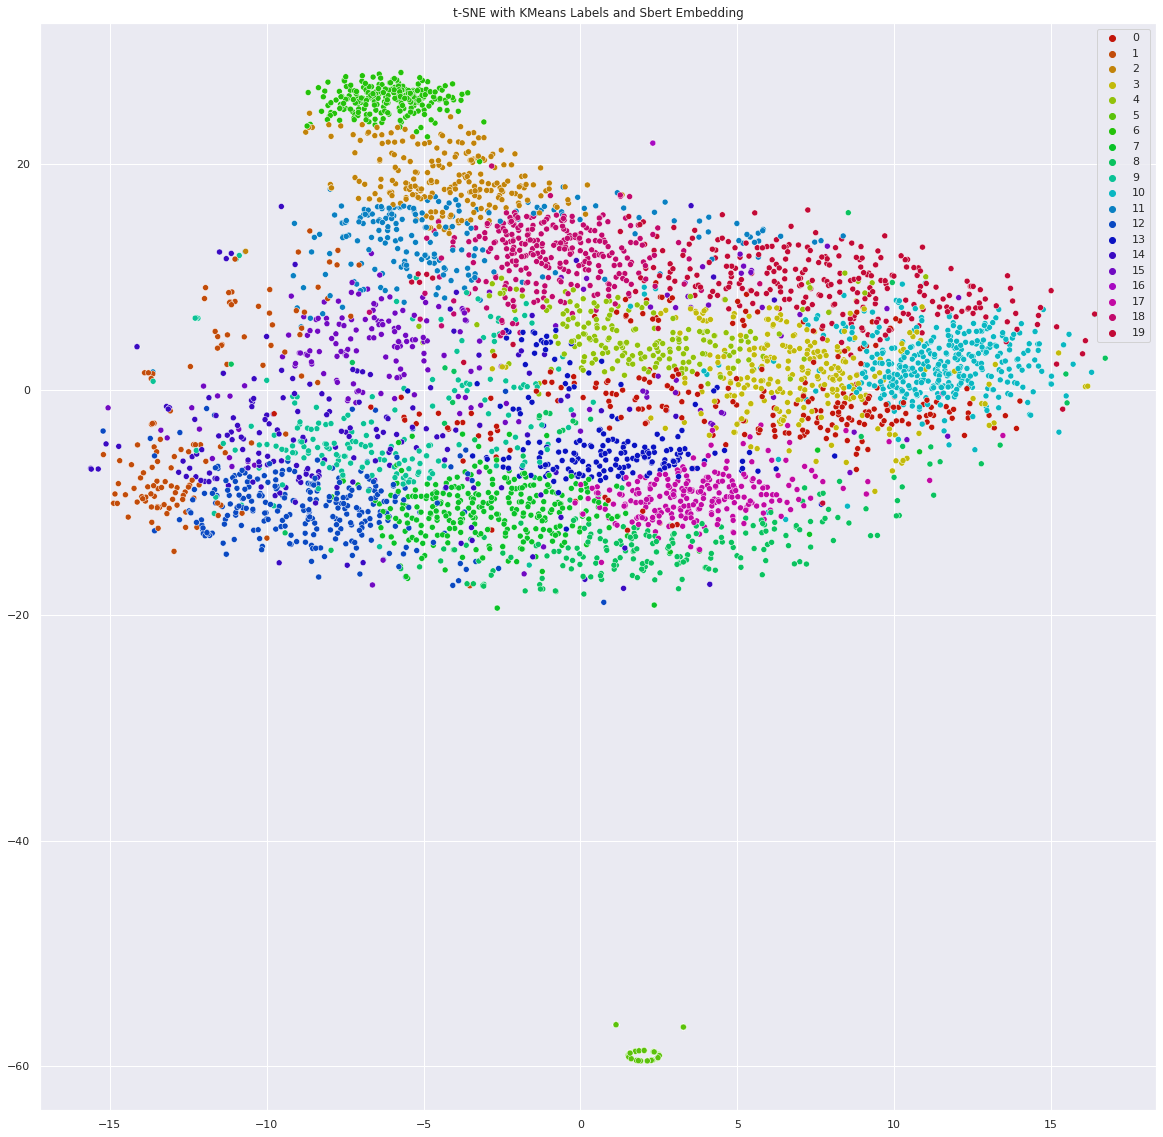

In [40]:
# clustering
## k must be matched with palette num
k = 20
kmeans = KMeans(n_clusters=k, random_state=2021)
## vec2 == embeded vectors
y_pred = kmeans.fit_predict(vec2)

# tsne
tsne = TSNE(verbose=1, perplexity=100, random_state=2021)     # perplexity : 유사정도
X_embedded = tsne.fit_transform(vec2)
print('Embedding shape 확인', X_embedded.shape)

# 시각화
sns.set(rc={'figure.figsize':(20,20)})
# colors
palette = sns.hls_palette(20, l=.4, s=.9) 
# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred,
                legend='full',palette=palette)     # kmeans로 예측

plt.title('t-SNE with KMeans Labels and Sbert Embedding')
plt.savefig(BASE_DIR + "/t-sne_question_Sbert_embedding.png")
plt.show()

Found distortion for 2 clusters
Found distortion for 3 clusters
Found distortion for 4 clusters
Found distortion for 5 clusters
Found distortion for 6 clusters
Found distortion for 7 clusters
Found distortion for 8 clusters
Found distortion for 9 clusters
Found distortion for 10 clusters
Found distortion for 11 clusters
Found distortion for 12 clusters
Found distortion for 13 clusters
Found distortion for 14 clusters
Found distortion for 15 clusters
Found distortion for 16 clusters
Found distortion for 17 clusters
Found distortion for 18 clusters
Found distortion for 19 clusters
Found distortion for 20 clusters
Found distortion for 21 clusters
Found distortion for 22 clusters
Found distortion for 23 clusters
Found distortion for 24 clusters
Found distortion for 25 clusters
Found distortion for 26 clusters
Found distortion for 27 clusters
Found distortion for 28 clusters
Found distortion for 29 clusters
Found distortion for 30 clusters
Found distortion for 31 clusters
Found distortion f

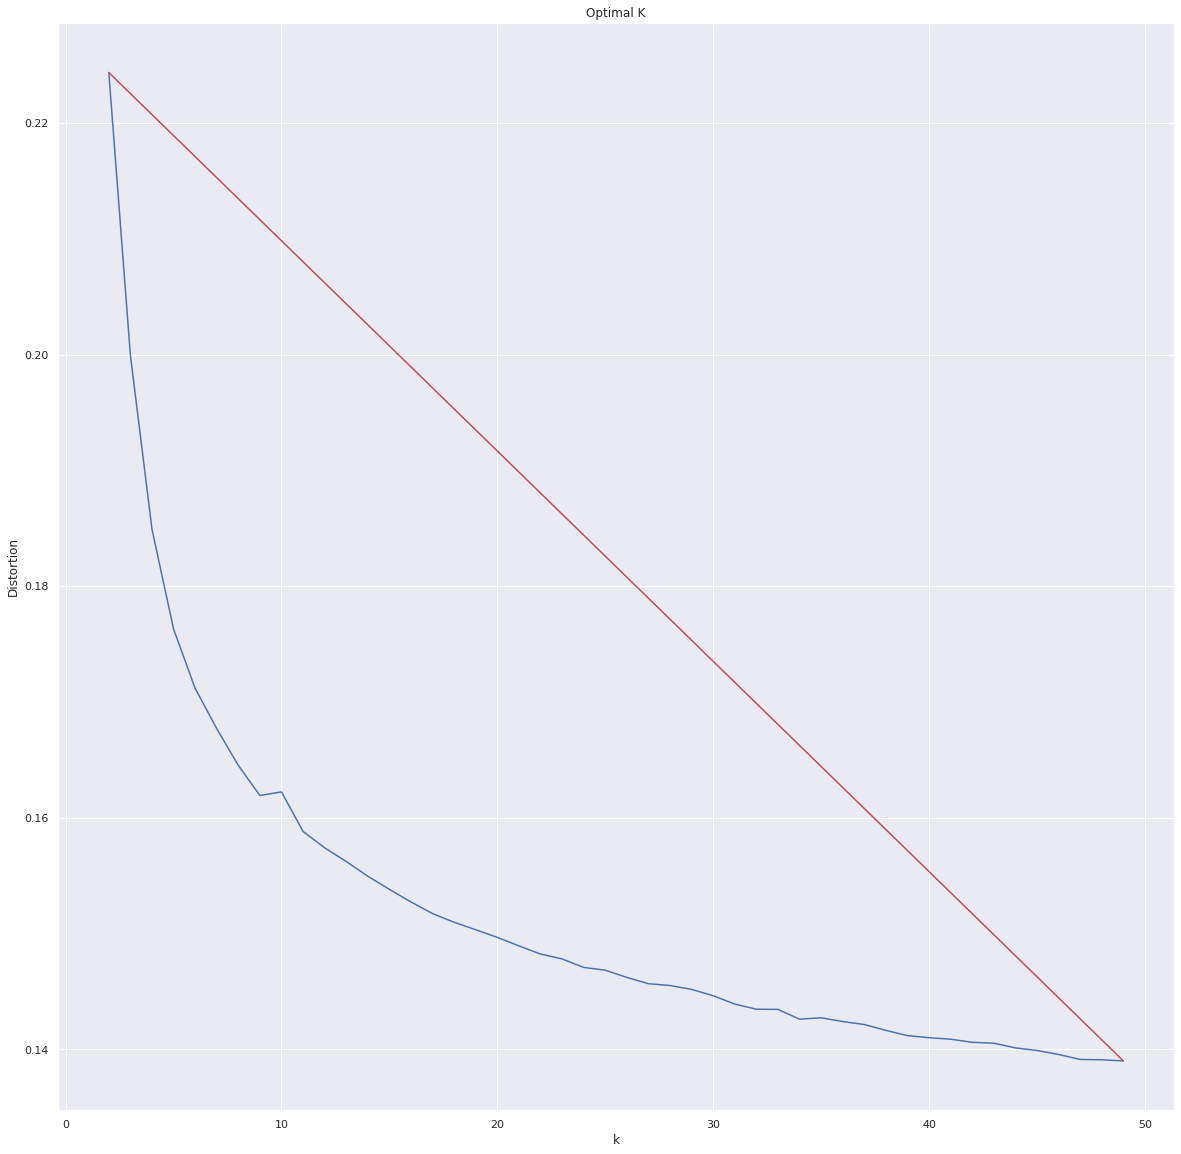

In [42]:
# 최적의 K 찾기 : 군집 갯수 k 찾기
from sklearn import metrics
from tqdm import tqdm
from scipy.spatial.distance import cdist

# K=50 개의 클러스터에 대해서 시각화
distortions = []
K = range(2, 50)
tqdm.pandas()

for k in K:
    k_means = KMeans(n_clusters=k, random_state=42).fit(vec2)
    k_means.fit(vec2)
    distortions.append(sum(np.min(cdist(vec2, k_means.cluster_centers_, 'cosine'), axis=1)) / vec2.shape[0])
    
    print('Found distortion for {} clusters'.format(k))

# Visualization
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-', marker='o')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Optimal K')
plt.show()

In [54]:
plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
## elow visualization for finding best k parameter
plt.rcParams['font.family'] = 'NanumGothic'
def elbow(x):
    sse = []
    for i in range (1,25):
        km = KMeans(n_clusters=i, init='k-means++', random_state=42)
        km.fit(x)
        sse.append(km.inertia_)
    
    plt.plot(range(1,50), sse, marker='o')
    plt.xlabel('클러스터 갯수')
    plt.ylabel('sse')
    plt.show();

In [ ]:
elbow(vec2)